# Project 2 

## Scientific Question: How do sex differences in androgen receptivity affect the expression of dopaminergic genes in the brain tissue of male and female mice?

One of the major differences between males and females is variation in hormonal levels, specifically testosterone and receptivity to androgen signalling molecules (Shi-fang et al., 1998).  

https://academic.oup.com/endo/article/139/4/1594/2987252

It has been hypothesized that sex-biased disorders such as autism and schizophrenia in males may be due to differences in androgen levels causing variation in gene expression.  Since schizophrenia is dopamine-related psychopathology this implicates androgen genes as potential modulators of dopaminergic genes.  Furthermore, it has been observed that gene expression for dopamine transporters (DAT and VMAT2) and protein levels of DAT were increased in the substantia nigra by androgens. (Purves-Tyson et al., 2014).  

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3949980/


## Scientific Hypothesis: If androgen receptor AR in brain tissue is differentially expressed then this should correlate with higher expression of dopaminergic genes DAT, DRD2, and VMAT2 in the brain. 

Androgen insensitivity syndrome (AIS) is a disorder where genetic males has some of the physical traits of females due to a lack of response to testosterone.  AIS is an X-linked disorder caused by mutations of the NR3C4 gene which codes for the androgen receptor (Ramos et al., 2018). This reduced sensitivity to androgens may be caused by lower expression of the NR3C4 gene.

https://pubmed.ncbi.nlm.nih.gov/29051026/

The role of androgen receptors in the expression of male characteristics implicates their role in other sex-biased conditions.  This suggests that the androgen receptor gene NR3C4 may play a role in dopaminergic pathologies such as schizophrenia.  I will investigate if dopamine receptor genes are differentially expressed in correlation with the androgen receptor gene.  

To answer this question and test my hypothesis I used Tabula Muris which is a collection of single cell transcriptome data from male and female mice.  It contains approximately 100,000 cell samples from 20 organs and tissues. This allows for comparison of gene expression in cell types taken from brain tissue.  

Since the Tabula Muris dataset is limited and NR3C4 is not present in the gene count matrix, I will be using gene label Ar for the androgen receptor.  I will also be using the gene label Slc6a3 for dopamine transporter gene DAT, Drd2 for dopamine receptor D2, and Slc18a2 for vesicular monamine transporter VMAT2.

https://www.ncbi.nlm.nih.gov/gene/367

https://www.ncbi.nlm.nih.gov/gene/13162

https://www.ncbi.nlm.nih.gov/gene/1813

https://www.ncbi.nlm.nih.gov/gene/6571


## Part 1: Load the Packages

- NumPy: This library is ideal for large datasets with its support for large multi-dimensional arrays and matrices.  There is a large collection of associated mathematical functions that can operate on these arrays.  It is highly efficient since it is coded in C which has fewer high-level abstractions and is closer to the 'bare metal' calculations of the computer.  NumPy is widely used in machine learning, data science, and visualization. To learn more about NumPy, see: https://numpy.org/

- Pandas: This is another library used for data manipulation and analysis, often in conjunction with numpy.  It offers data structures and functions for manipulating numerical tables and times series.  Pandas can efficiently read in categorical and numerical data, such as from CSV files, then perform operations such as slice, filter, reshape, realign, merge, and join.  It is widely used in statistics, data science, machine learning, and many fields of science such as Bioinformatics.  To learn more about Pandas, see: https://pandas.pydata.org/

- Scanpy: This toolkit is used for analyzing single-cell gene expression data.  It is dependent on anndata, a library which offers its anndata data structure for handling multiple matrices in a single object.  Scanpy includes numerous capabilities for preprocessing, visualization, clustering, trajactory inference and differential expression testing.  It is widely used in RNA Seq workflows and can efficiently handle datasets of more than one million cells.  To learn more about scanpy, see: https://scanpy.readthedocs.io/en/stable/

- OS: This is a core library to python used to navigate the local system and file directory.

- Matplotlib: This library is used for creating static, animated, and interactive visualizations.  It is highly customizable and can create a wide array of plots for presenting data.  Many other scientific libraries use matplotlib to display data, such as SciPy.  It used in this project to generate visualizations and help perform quality control by showing distributions between data subsets.  To learn more about matplotlib, see: https://matplotlib.org/

- SciPy: This library contains a wide array of efficient functions designed for scientific computing.  It provides fundamental algorithms ranging from optimization, linear algebra, integration, to solving differential equations.  It also offers clustering algorithms such as hierarchical and k-means, as well as statistical tools such as t-tests which I use to get p-values for differential expression.  SciPy extends the NumPy and provide additional tools for computing with sparse matrices and k-dimensional trees.  To learn more about SciPy, see: https://scipy.org/

- Sklearn: Sklearn, or scikit-learn, offers efficient tools for predictive data analysis.  It specializes in machine learning and has algorithms for classification, regression, clustering, and dimensionality reduction.  Sklearn is designed to interoperate with NumPy and SciPy.  I will be using it for KMeans hierarchical clustering.  To learn more about Sklearn, see: https://scikit-learn.org/stable/


In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import matplotlib.pyplot as plt # import matplotlib to visualize our qc metrics
from scipy.stats import ttest_ind
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

%matplotlib inline # This command allows for presenting matplotlib visualizations in the notebook

UsageError: unrecognized arguments: # This command allows for presenting matplotlib visualizations in the notebook


## Part 2: Load in the data and perform Bioinformatics Analyses

Based on the RNA Seq course by the Hemberg Lab with help from the Computational Biology team at the Chan Zuckerberg Initiative.

https://chanzuckerberg.github.io/scRNA-python-workshop/intro/about.html

I will be loading in Smartseq2 data from the mouse brain which consists of the expression matrix `brain_counts.csv` where each column corresponds to a gene (or transcript) and each row corresponds to a single cell sample.  The metadata for each cell is loaded from `brain_metadata.csv` which consists of the cell type, tissue and sex of the mouse.  

In [3]:
# This is the path where data is initially loaded and later stored on the local machine  
# It is a global variable which means it can be accessed anywhere throughout the notebook
#  Any variable not within a loop or a function can be considered global
path = '/home/vince/Downloads/data/'
# This is a bash command to show the contents of the directory
!ls $path

brain_clusters.h5ad    brain_normalized.h5ad	     glioblastoma_raw.h5ad
brain_counts.csv       brain_qc.h5ad		     pbmc3k.h5ad
brain_embeddings.h5ad  brain_raw.h5ad
brain_metadata.csv     glioblastoma_normalized.h5ad


In [99]:
# Use pandas to make a new DataFrame with the contents of `brain_counts.csv` from the path directory
count_dataframe = pd.read_csv(path + 'brain_counts.csv', # Location of data
                              index_col=0) # Sets the first column as the index to label the rows

## Print the first 2 rows of the brain counts dataframe
print(count_dataframe.head(2)) 


                       0610005C13Rik  0610007C21Rik  0610007L01Rik  \
A1.B003290.3_38_F.1.1              0            125             16   
A1.B003728.3_56_F.1.1              0              0              0   

                       0610007N19Rik  0610007P08Rik  0610007P14Rik  \
A1.B003290.3_38_F.1.1              0              0              0   
A1.B003728.3_56_F.1.1              0              0            324   

                       0610007P22Rik  0610008F07Rik  0610009B14Rik  \
A1.B003290.3_38_F.1.1              0              0              0   
A1.B003728.3_56_F.1.1              0              0              0   

                       0610009B22Rik  ...  Zxdb  Zxdc  Zyg11a  Zyg11b  Zyx  \
A1.B003290.3_38_F.1.1              0  ...     0     0       0       0    0   
A1.B003728.3_56_F.1.1              0  ...     0     0       0       0    0   

                       Zzef1  Zzz3  a  l7Rn6  zsGreen_transgene  
A1.B003290.3_38_F.1.1      0     0  0     54                  0  


In [100]:
# There are 3401 rows which represent single cell samples and 23433 columns which represent different genes
count_dataframe.shape

(3401, 23433)

In [101]:
# This loads the cell sample metadata information into a dataframe
metadata_dataframe = pd.read_csv(path + 'brain_metadata.csv', index_col=0)

print(metadata_dataframe.head(2))

                      cell_ontology_class subtissue mouse.sex mouse.id  \
cell                                                                     
A1.B003290.3_38_F.1.1           astrocyte  Striatum         F   3_38_F   
A1.B003728.3_56_F.1.1           astrocyte  Striatum         F   3_56_F   

                      plate.barcode  
cell                                 
A1.B003290.3_38_F.1.1       B003290  
A1.B003728.3_56_F.1.1       B003728  


In [102]:
# There are 3401 rows for each of the single cell samples, and 5 columns of metadata
metadata_dataframe.shape

(3401, 5)

In [103]:
# Data exploration, loops through the columns of the metadata and counts unique values 
# We can see oligodendrocytes are most common and Bergmann glial cells least common
# Cells tend to be sampled from the cortex and hippocampus
# Males are over-represented in the dataset
for col in metadata_dataframe.columns:
    # Col is a local variable, not accessible outside of the for loop
    print(col)
    print(pd.value_counts(metadata_dataframe[col]))

cell_ontology_class
oligodendrocyte                   1574
endothelial cell                   715
astrocyte                          432
neuron                             281
oligodendrocyte precursor cell     203
brain pericyte                     156
Bergmann glial cell                 40
Name: cell_ontology_class, dtype: int64
subtissue
Cortex         1149
Hippocampus     976
Striatum        723
Cerebellum      553
Name: subtissue, dtype: int64
mouse.sex
M    2694
F     707
Name: mouse.sex, dtype: int64
mouse.id
3_10_M    980
3_9_M     871
3_8_M     590
3_38_F    355
3_11_M    253
3_39_F    241
3_56_F    111
Name: mouse.id, dtype: int64
plate.barcode
MAA000560    287
MAA000926    263
MAA000581    190
MAA000944    184
MAA000932    174
MAA001894    147
MAA000564    143
MAA000942    136
MAA000935    131
MAA000941    125
MAA000930    111
MAA000923    108
MAA000947    107
B003290       98
MAA000561     97
MAA000615     95
B003275       93
MAA000641     67
B003728       66
MAA000940     

In [104]:
# Creates an AnnData object which are used for linking multiple matrices together
# The X matrix stores the gene expression matrix, and the obs matrix stores metadata for each cell observation
# The vars represent the different genes as the 'variables'
adata = sc.AnnData(X = count_dataframe, obs = metadata_dataframe)
print(adata)

AnnData object with n_obs × n_vars = 3401 × 23433
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode'


#### Labeling spike-ins 

Because this is smartseq2 data, there may be spike-ins where the gene names start with ERCC. We can label them in adata.var as a gene annotation.  These are used for quality control purposes.

In [105]:
# Dictionary of genes and whether they are spike ins
is_spike_in = {}
# Count of spike ins
number_of_spike_ins = 0

# Loops through each gene in the AnnData object
for gene_name in adata.var_names:
    # gene_name is a local variable, not accessible outside of the for loop
    if 'ERCC' in gene_name:
        # Record that we found a spike-in
        is_spike_in[gene_name] = True 
        # Increase counter
        number_of_spike_ins += 1
    else:
        # Record that this was not a spike-in
        is_spike_in[gene_name] = False #
        
# The index of adata.var and the keys of is_spike_in are identical, AnnData will match them up
adata.var['ERCC'] = pd.Series(is_spike_in) 
print('found this many spike ins: ', number_of_spike_ins)

found this many spike ins:  92


In [43]:
# Save the AnnData object in a .h5ad file 
# Useful for creating 'checkpoints' and to save backups of computationally expensive data
adata.write(path + 'brain_raw.h5ad')

/home/vince/Bio/utils/miniconda3/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'cell_ontology_class' as categorical
/home/vince/Bio/utils/miniconda3/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'subtissue' as categorical
/home/vince/Bio/utils/miniconda3/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_cat

### Pre-processing Quality Control

The gene expression matrix should be examined to remove low quality cells which had few raw reads. This step is to reduce technical noise that can obscure biological signals in later analysis.

#### Computing quality control metrics 

The quality metrics are computed to filter cells and genes accordingly.

The calculate_qc_metrics function returns two dataframes: one containing quality control metrics about cells, and one containing metrics about genes. This function is housed in the 'preprocessing' portion of the SCANPY library, which you can read more about here.

In [117]:
# Load the AnnData object from the file we just saved in the checkpoint
adata = sc.read(path + 'brain_raw.h5ad')

# This function returns a tuple of two dataframes (cell_qc_dataframe, gene_qc_dataframe)
# Uses percentage of reads from spike ins to calculate quality
qc = sc.pp.calculate_qc_metrics(adata, qc_vars = ['ERCC'])
                                
cell_qc_dataframe = qc[0]
gene_qc_dataframe = qc[1]

print('This is the cell quality control dataframe:')
print(cell_qc_dataframe.head(2))

print('\n\n\n\nThis is the gene quality control dataframe:')
print(gene_qc_dataframe.head(2))

This is the cell quality control dataframe:
                       n_genes_by_counts  log1p_n_genes_by_counts  \
cell                                                                
A1.B003290.3_38_F.1.1               3359                 8.119696   
A1.B003728.3_56_F.1.1               1718                 7.449498   

                       total_counts  log1p_total_counts  \
cell                                                      
A1.B003290.3_38_F.1.1      390075.0           12.874097   
A1.B003728.3_56_F.1.1      776439.0           13.562474   

                       pct_counts_in_top_50_genes  \
cell                                                
A1.B003290.3_38_F.1.1                   25.884766   
A1.B003728.3_56_F.1.1                   43.051933   

                       pct_counts_in_top_100_genes  \
cell                                                 
A1.B003290.3_38_F.1.1                    32.847017   
A1.B003728.3_56_F.1.1                    52.912721   

            

### Quality control for cells 

#### Library size 
The total number of reads detected per cell are calculated to remove those with low read counts, as they are likely to have been broken.

(0.0, 10000000.0)

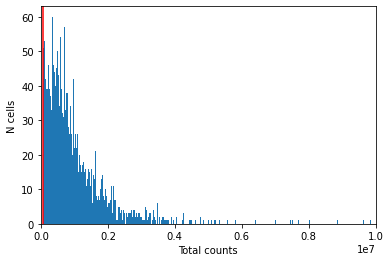

In [118]:
# Calls matplotlib histogram function based on total counts in cell_qc_dataframe
# Bins set to 1000 for greater granularity of total counts
plt.hist(cell_qc_dataframe['total_counts'], bins=1000)
# Sets the X axis label
plt.xlabel('Total counts')
# Sets the Y axis label
plt.ylabel('N cells')
# Draws a line at 50,000 which is the threshold for low read counts
plt.axvline(50000, color='red')
# Scales the plot down to a max count of 10,000,000 on the x axis
plt.xlim(0,1e7)

#### Detected genes 
The total number of unique genes detected in each sample are counted to ensure that the reads are distributed across the transcriptome.

The plot shows that most cells have between ~1,000-5,000 detected genes.  Notably there is a small peak on the left hand side of the distribution.  Assuming equal detection rates were equal across cells there should be a normal distribution, so cells in the tail of the distribution (fewer than 1000 detected genes) will be removed.

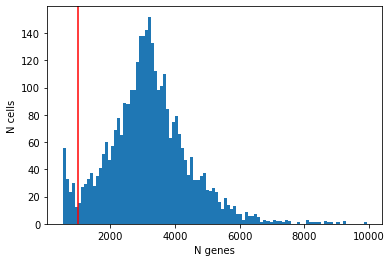

In [119]:
# Histogram plot of the number of genes read for each cell sample
plt.hist(cell_qc_dataframe['n_genes_by_counts'], bins=100)
plt.xlabel('N genes')
plt.ylabel('N cells')
# Red vertical line represents threshold of cells we will remove since they have too few gene counts
plt.axvline(1000, color='red')

#### Spike-ins 

The ratio between ERCC spike-in RNAs and endogenous RNAs is a useful quality control metric since high levels of spike-in RNAs signify low starting amounts of RNA, due to the cell being dead or stressed.  Removing such cells is good for cleaning the dataset of potential confounders.    

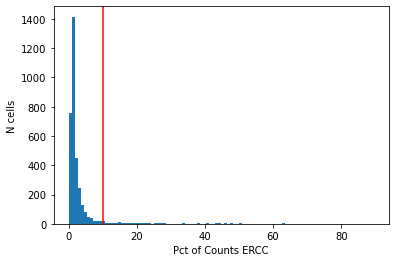

In [120]:
# Histogram plot of the percent of all gene counts which are spike-ins 
plt.hist(cell_qc_dataframe['pct_counts_ERCC'], bins=100)
plt.xlabel('Pct of Counts ERCC')
plt.ylabel('N cells')
# A threshold of at most 10% spike-ins is a reasonable metric 
plt.axvline(10, color='red')

#### Cell filtering 

To define a cell filter based on the quality control findings I will create a boolean mask to only keep those with low levels of spike-ins.

In [121]:
# Boolean mask which returns a series of True or False by whether the amount of spike-ins was less than 10%
low_ERCC_mask = (cell_qc_dataframe['pct_counts_ERCC'] < 10)
# Keeps only rows that were True in the mask
adata = adata[low_ERCC_mask]

In [122]:
print('Number of cells before filtering:', adata.n_obs)
# ScanPy pre-processing function to filter cells based on criteria
# Keeps only cells with a minimum of 750 genes counted
sc.pp.filter_cells(adata, min_genes=750)
# 8 cells removed that did not have a minimum of 750 genes
print('Number of cells after filtering:', adata.n_obs)

Number of cells 3218


Trying to set attribute `.obs` of view, copying.


Number of cells after filtering 3210


#### Quality control for genes 

Genes with low expression level should also be removed. A gene is defined as detectable if at least two cells contain more than 5 reads from the gene. Genes must be filtered after cell filtering since some genes may only be detected in poor quality cells.

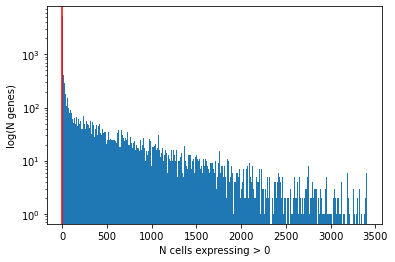

In [123]:
# Plots number of genes by how many cells they are counted within
plt.hist(gene_qc_dataframe['n_cells_by_counts'], bins=1000)
plt.xlabel('N cells expressing > 0')
# Visual clarity, compresses Y axis
plt.yscale('log') 
plt.ylabel('log(N genes)') 
# Threshold of at least 2 cells
plt.axvline(2, color='red')

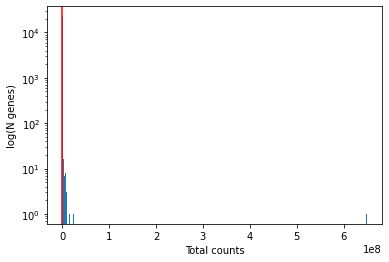

In [124]:
# Plots number of genes by their total count across all cells
plt.hist(gene_qc_dataframe['total_counts'], bins=1000)
plt.xlabel('Total counts')
plt.ylabel('log(N genes)')
plt.yscale('log') 
# Threshold of at least 10 counts across all cells
plt.axvline(10, color='red')

In [125]:
# Filters AnnData object removing genes showing up in fewer than 2 cells
sc.pp.filter_genes(adata, min_cells=2)
# Filters AnnData object removing genes showing up fewer than 10 times across all cells
sc.pp.filter_genes(adata, min_counts=10)

In [128]:
# Final dimensions of the QC'd dataset
print(adata) 
# Checkpoint, save data to brain_qc 
adata.write(path + 'brain_qc.h5ad')


AnnData object with n_obs × n_vars = 3210 × 18585
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes'
    var: 'ERCC', 'n_cells', 'n_counts'


### Normalization and Principle Components Analysis 

Single cell data is messy and often contains noise from technical artifacts, batch effects, and other confounders. Before analyzing the data, this unwanted variation must be reduced as much as possible.

Dimensionality reduction methods seek to take a large set of variables and return a smaller set of components that still contain most of the information in the original dataset.

Principal component analysis (PCA) is one of the simplest dimensionality reduction algorithms, which uses a mathematical procedure to transforms possibly correlated variables (in this case the expression of genes in a network) into a smaller number of uncorrelated variables called the principal components (PCs).

This type of dimensionality reduction is useful because cells respond to their environment by turning on regulatory programs that result in expression of modules of genes. As a result, gene expression displays structured co-expression, and dimensionality reduction by principle component analysis groups those co-varying genes into principle components, ordered by how much variation they explain.

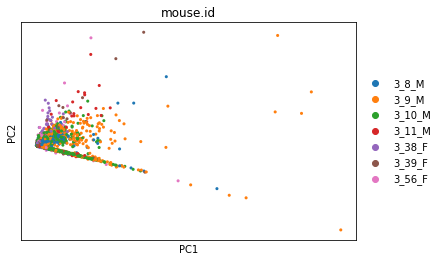

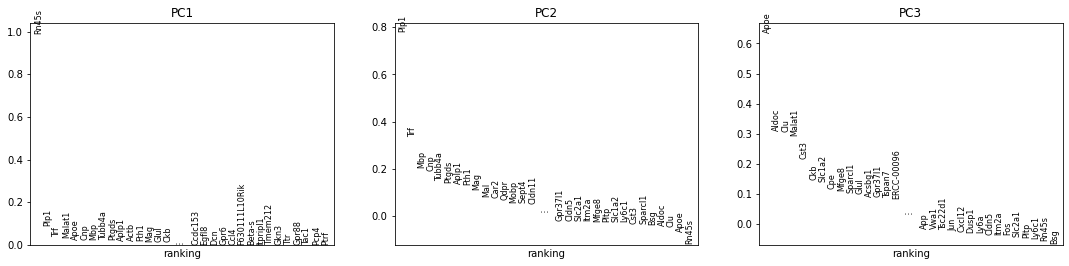

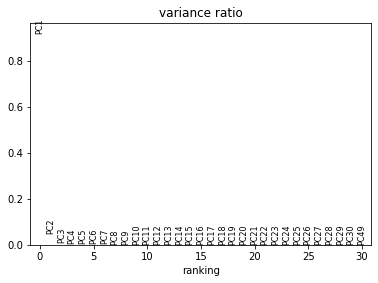

In [131]:
# Load in the saved data after quality control processing
adata = sc.read(path + 'brain_qc.h5ad')
# Principle components analysis function on adata object
sc.pp.pca(adata)
# Plot the PCA result, color by each cell's mouse.id metadata
sc.pl.pca_overview(adata, color='mouse.id')

Highly linear relation in first PC captures most of the variation, which suggests outliers.  

Second row of plots show how much each gene contributes to the respective PCs.  The first PC is determined mostly by Rn45s.

The bottom plot shows that PC1 captures the vast majority of the variance in the dataset.

#### Normalizing cell library size

Variation in RNA-Seq can be due to libary size caused by natural differences in cell size, variation of RNA capture, variation in the efficiency of PCR amplification, and cell representation from multiplexing.  Much of variation in size due to technical factors, so cells should be normalized to have comparable RNA content.

#### CPM

The simplest way to normalize this data is to convert it to counts per million (CPM) by dividing each row by a size factor (the sum of all counts in the row), then multiplying by 1,000,000. This method assumes that each cell originally contained the same amount of RNA.

In [132]:
# Makes a copy of the original adata object for comparision
adata_cpm = adata.copy()
# Stores a copy of the raw values befor normalization
adata_cpm.raw = adata_cpm
# ScanPy pre-processing function which normalize seach cell by total counts over all genes
# This results in every cell having the same total count after normalization.
# Takes in the AnnData object
# counts_per_cell_after parameter sets the counts for each cell to be 1 million
sc.pp.normalize_per_cell(adata_cpm, counts_per_cell_after=1e6)

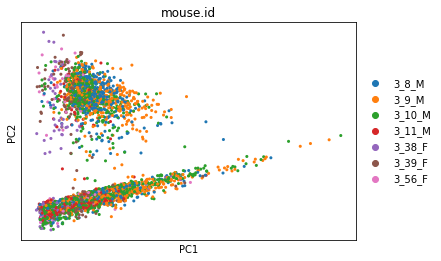

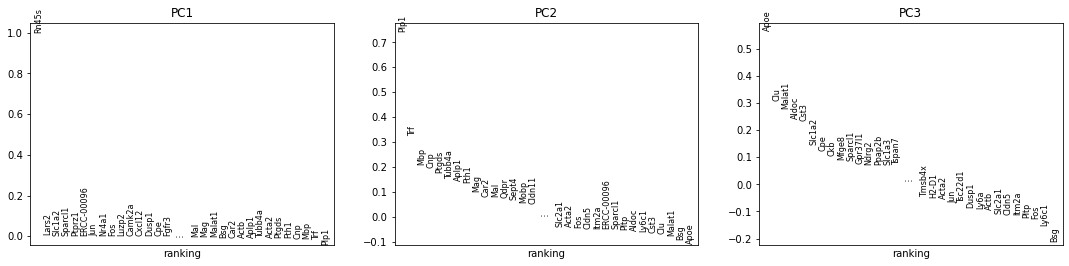

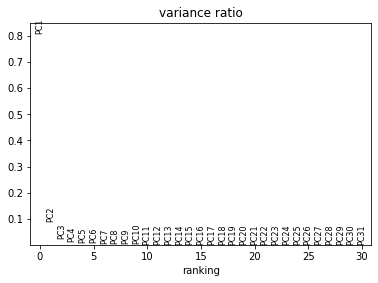

In [133]:
# Runs PCA again, now after normalizing the data
sc.pp.pca(adata_cpm)
# Plot the PCA
sc.pl.pca_overview(adata_cpm, color='mouse.id')

We can now see two main clusters more clearly than before, however the overall distribution of the importance of certain genes remains largely unchanged.  

A potential drawback of CPM is if the sample contains genes that are both very highly expressed and differentially expressed across the cells. In this case, the total molecules in the cell may depend of whether such genes are on/off in the cell and normalizing by total molecules may hide the differential expression of those genes and/or falsely create differential expression for the remaining genes. To mitigate this exclude highly expressed genes from the size factor estimation.

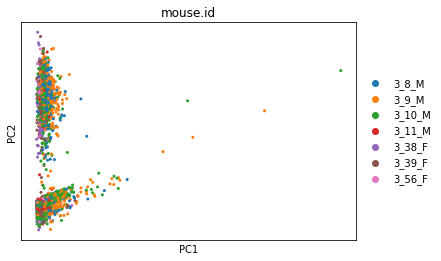

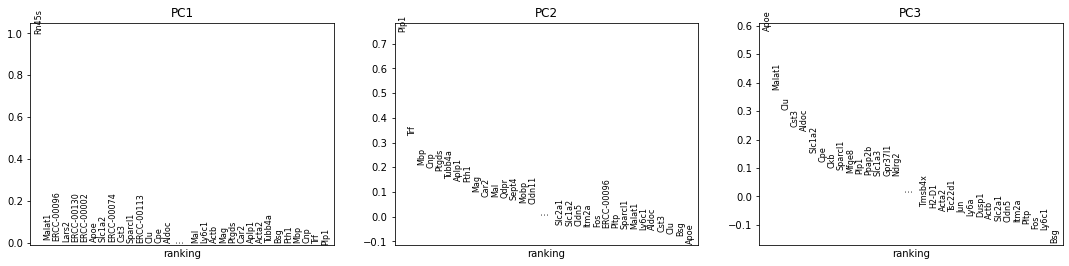

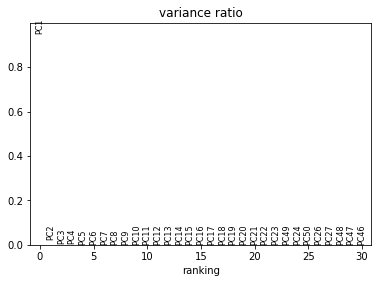

In [135]:
# Make another copy of the original AnnData object for comparison
adata_cpm_ex = adata.copy() 
# The function normalize_total normalize seach cell by total counts over all genes,
# Each cell will have the same sum, setting `target_sum=1e6`, will result in CPM normalization.
# The parameter `exclude_highly_expressed=True`, very highly expressed genes are excluded
# This is useful as they can strongly distort the resulting normalized values for all other genes
sc.pp.normalize_total(adata_cpm_ex, target_sum=1e6, exclude_highly_expressed=True)
# Run PCA
sc.pp.pca(adata_cpm_ex) # run pca
# Plot the PCA
sc.pl.pca_overview(adata_cpm_ex, color='mouse.id')

#### Normalizing gene expression 

We can see the dataset is dominated by a small set of highly expressed genes. One thing to test is to determine if the over-represented gene, Rn45s, when removed, yields a more reasonable analysis. This can be assessed by removing the gene and re-running PCA.

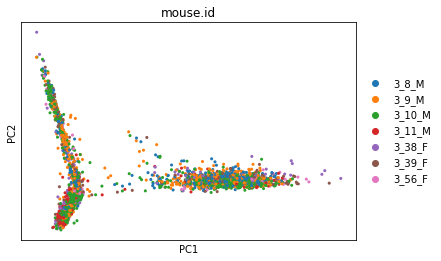

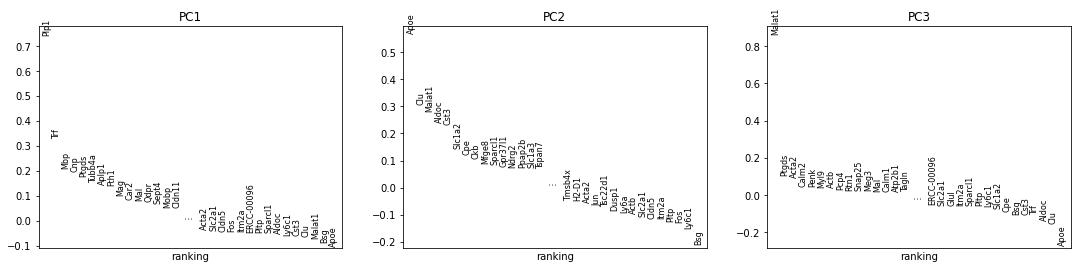

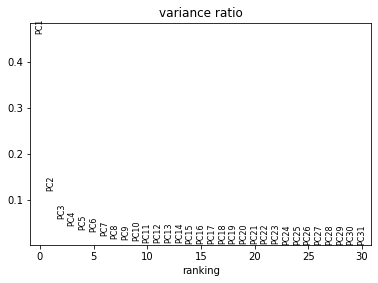

In [139]:
# Create a boolean mask, removing the gene Rn45s from the variables columns
not_Rn45s = adata_cpm.var.index != 'Rn45s'
# Filters out the column for gene Rn45s
adata_no_Rn45s = adata_cpm[:, not_Rn45s]
# Run PCA on the new dataset
sc.pp.pca(adata_no_Rn45s)
# Plot PCA
sc.pl.pca_overview(adata_no_Rn45s, color='mouse.id')

This is a moderate improvement since there are now other genes contributing to the overall variance in PC1. 

Another approach is to center and scale the gene expression values, much like a z-score. This places an equal weight on each gene for downstream analysis, which may not always be appropriate. The advantage is that it de-emphasizes the small handful of genes that are differentially expressed at high levels, dominating the dataset.

First, we take the log(1+x) of each value. The +1 makes sure that 0 values in the original data still map to 0 in log space (and prevents us from trying to take the log of 0). This makes the expression values more closely approximate a Gaussian distribution, which is an assumption inherent to many downstream analysis methods.

Then for each gene, we subtract the mean expression value and divide by the standard deviation.

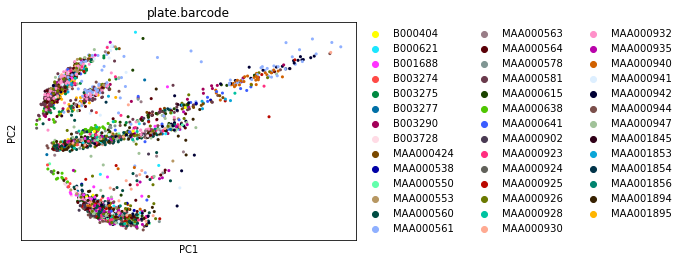

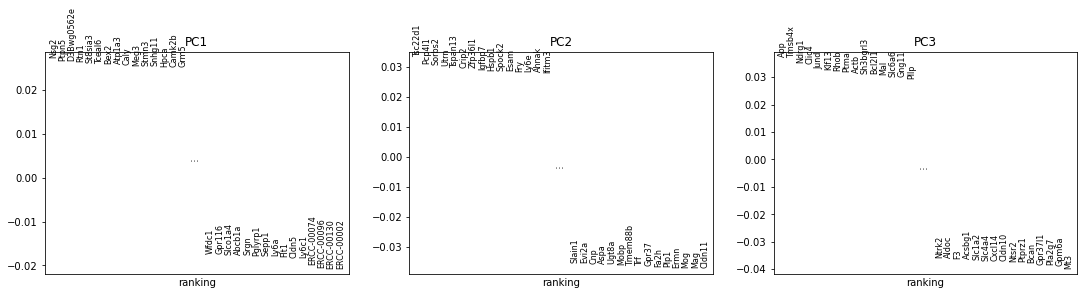

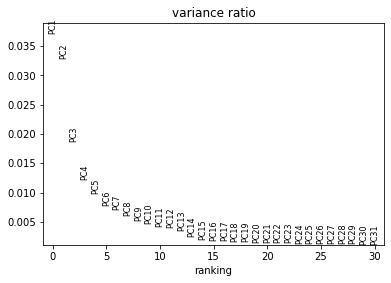

In [141]:
# Calculates log(1+x) of each value to map to log space
# Approximates a Gaussian distribution
sc.pp.log1p(adata_cpm)
# Subtract the mean expression value and divide by the standard deviation.
sc.pp.scale(adata_cpm)
# Run PCA on 
sc.pp.pca(adata_cpm)
# Plot PCA, color by `plate.barcode` metadata for each normalized cell
sc.pl.pca_overview(adata_cpm, color='plate.barcode')

This a marked improvement. The first PCA plot now shows a more Gaussian grouping of the cells. The second row of plots has a wider distribution of loadings where each principal component has a number of genes contributing.  The final plot shows the top ranking PCs each capture a decent amount of the variance.  

In [142]:
# Save the normalized data to `brain_normalized.h5ad` in the directory indicated by path
adata_cpm.write(path + 'brain_normalized.h5ad')

### Dimensionality reduction

Dimensionality reduction methods seek to take a large set of variables and return a smaller set of components that still contain most of the information in the original dataset. This implies an inherent tradeoff between information loss and improved interpretability: all dimensionality reduction methods discard some information, but they also play an important role in helping make sense of a giant matrix of values.

In [4]:
# Load the normalized data
adata = sc.read(path + 'brain_normalized.h5ad')

#### tSNE 

An alternative to PCA for visualizing scRNASeq data is a tSNE plot. tSNE (t-Distributed Stochastic Neighbor Embedding) combines dimensionality reduction (e.g. PCA) with random walks on the nearest-neighbour network to map high dimensional data (i.e. our 18,585 dimensional expression matrix) to a 2-dimensional space. In contrast with PCA, tSNE can capture nonlinear structure in the data, and tries to preserve the local distances between cells. Due to the non-linear and stochastic nature of the algorithm, tSNE is more difficult to intuitively interpret: while tSNE faithfully represents local relationships, it doesn't always capture the relatioships between more distant cells correctly.

tSNE is a stochastic algorithm which means running the method multiple times on the same dataset will result in different plots. To ensure reproducibility, we fix the "seed" of the random-number generator in the code below so that we always get the same plot.

/home/vince/Bio/utils/miniconda3/envs/scanpy/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


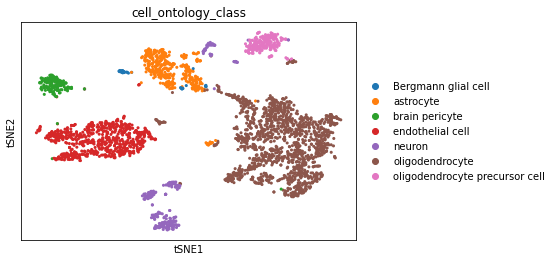

In [5]:
# The t-distributed stochastic neighborhood embedding algorithm
# Takes in the annotated data matrix
# Perplexity is related to number of nearest neigbhors, requires larger values for larger datasets
# A high learning rate may result in early exaggeration during initial optimization
# Too low a learning rate may result in bad local minima
# Fix the random state to 0 for reproducibility
sc.tl.tsne(adata, perplexity=30, learning_rate=1000, random_state=0)
# Plot the clustered data by color of cell type
sc.pl.tsne(adata, color='cell_ontology_class')

## UMAP 

UMAP (Uniform Approximation and Projection) is another nonlinear dimensionality reduction method. Like tSNE, UMAP is nondeterministic and requires a fixed random seed to ensure reproducibility. While tSNE optimizes for local structure, UMAP tries to balance the preservation of local and global structure. For this reason, UMAP is preferred over tSNE for exploratory analysis and general visualization.

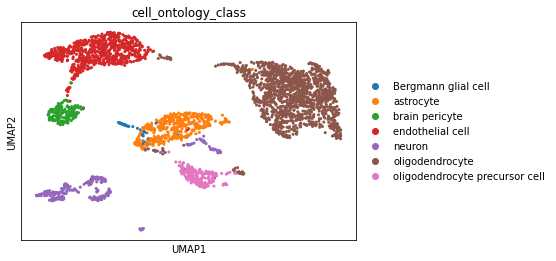

In [6]:
# UMAP is based on the neighbor graph, which requires computing first
sc.pp.neighbors(adata) 
# UMAP function, takes in annotated data matrix
# The min_dist parameter is the effective minimimum distance between embedded points
#  smaller values result in more clustered embedding, larger more even dispersal
# The spread parameter is the effective scale of embedded points, also determines 
#  how clustered/clumped the embedded points are
# The random_state parameter fixes the random seed for reproducibility
# The n_components parameter is the number of dimensions of the embedding, 2 is most useful
sc.tl.umap(adata, min_dist=0.5, spread=1.0, random_state=1, n_components=2)
# Plot the UMAP, color by cell type
sc.pl.umap(adata, color='cell_ontology_class')

UMAP seems to result in better clustering the cells with clean groupings than tSNE.  

I'll try coloring the UMAP by other metadata such as tissue.

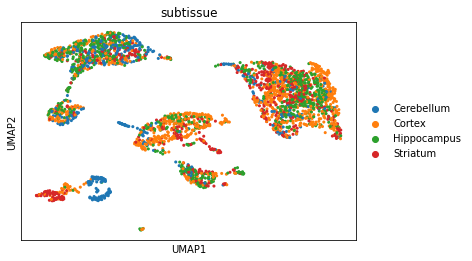

In [7]:
# Plot the UMAP, color by cell type
sc.pl.umap(adata, color='subtissue')

This results in a far less effective clustering, however we can still see patterns such as neuron cells from the cerebellum group together.  The oligodendrocytes from various subtissues also tend to cluster together, but it's still quite messy.  While the endothelial cells seem to lose much of their structure.  

In [8]:
# Checkpoint, save the clustered data to `brain_embedding.h5ad`
adata.write(path + 'brain_embeddings.h5ad')

### Clustering

Grouping cells based on the similarity of their expression profiles allows us to identify cell types and states, as well as infer differences between groups. This is done either via clustering or community detection.

Unsupervised clustering is useful in many different applications and has been widely studied in machine learning. Some of the most popular approaches are hierarchical clustering and k-means clustering. These methods compute a distance metric between cells (often based on a low-dimensional representation, such as PCA, tSNE or UMAP), and then iteratively group cells together based on these distances.

Community detection methods (also referred to as 'graph-based clustering') partition the neighbor graph. The neighbor graph treats each cell as a node, with edges connecting each node to its k nearest neighbors (based on similar distance metrics described above). The graph is then partitioned into modules based on these connectivities. These methods are typically faster than other clustering methods with similar effectiveness.

One thing virtually all clustering or community detection methods have in common is some flavor of a resolution parameter. This parameter controls how fine- or coarse-grained the inferred clusters are.

Here, we'll explore k-means clustering and the graph-based leiden clustering method.

In [9]:
# Load the AnnData object from the local `brain_embeddings` file
adata = sc.read(path + 'brain_embeddings.h5ad')

### k-means 

In k-means clustering, the goal is to partition N cells into k different clusters. This is done in an iterative manner, cluster centers are assigned and each cell is assigned to its nearest cluster.

/home/vince/Bio/utils/miniconda3/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'kmeans' as categorical


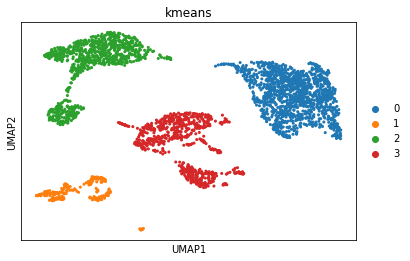

In [10]:
# Extract the UMAP coordinates that were computed earlier
umap_coordinates = adata.obsm['X_umap']
# The Kmeans algorithm tries to cluster data into n_clusters of equal variance, set random seed for reproducibility
kmeans = KMeans(n_clusters=4, random_state=0).fit(umap_coordinates)
# Add the labels to kmeans metadata column in the AnnData object
adata.obs['kmeans'] = kmeans.labels_ 
# Cast the labels as strings
adata.obs['kmeans'] = adata.obs['kmeans'].astype(str)
# Plot the UMAP points, with color determined by KMeans cluster labels
sc.pl.umap(adata, color='kmeans')

### Evaluating clustering 

Intuitively, we can see from the plot that our value of k (the number of clusters) is probably too low.

This dataset has "ground truth" cell type labels available. We can use these to assess our cluster labels a bit more rigorously using the adjusted Rand index. This index is a measure between (0, 1) which indicates the similarity between two sets of categorical labels (e.g., our cell type labels and cluster labels). A value of 1 means the two clusterings are identical, and 0 means the level of similarity expected by random chance.

In [11]:
# Calculates the Rand index which is a similarity measure between two clusterings
# Takes in true labels which are the cell types
# The predicted labels are the kmeans clusters
# If kmeans is accurate we should expect a Rand index close to 1
rand_index = adjusted_rand_score(labels_true = adata.obs['cell_ontology_class'], labels_pred = adata.obs['kmeans'])
print('The Rand index is', round(rand_index, 2))

The Rand index is 0.82


/home/vince/Bio/utils/miniconda3/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'kmeans' as categorical


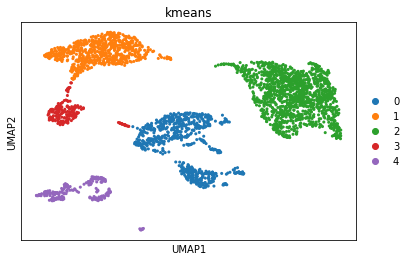

The Rand index is 0.87


In [12]:
# Re-computing Kmeans labels on UMAP coordinates with 5 clusters 
kmeans = KMeans(n_clusters= 5, random_state=0).fit(umap_coordinates)
# Reset Kmeans labels in metadata column of the AnnData object
adata.obs['kmeans'] = kmeans.labels_ 
adata.obs['kmeans'] = adata.obs['kmeans'].astype(str)
# Plot the results
sc.pl.umap(adata, color='kmeans') 
rand_index = adjusted_rand_score(labels_true = adata.obs['cell_ontology_class'], labels_pred = adata.obs['kmeans'])
print('The Rand index is', round(rand_index, 2))

Increasing the number of clusters has has improved the Rand index from 0.82 to 0.87 

### Graph-based methods 

Graph-based methods attempt to partition a pre-computed neighhbor graph into modules (i.e., groups / clusters of cells) based on their connectivity. Currently, the most widely used graph-based methods for single cell data are variants of the louvain algorithm. The intuition behind the louvain algorithm is that it looks for areas of the neighbor graph that are more densely connected than expected (based on the overall connectivity in the graph).

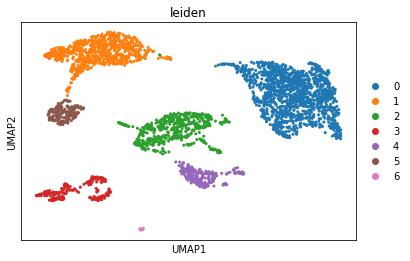

The Rand index is 0.92


In [18]:
# Leiden clustering algorithm, designed for single cell analysis
# Takes in an AnnData matrix object
# The resolution parameter controls coarseness of clustering, higher values cause more clusters
sc.tl.leiden(adata, resolution=0.1, random_state=0)
# Plot the results, color with leiden labels
sc.pl.umap(adata, color='leiden')
# Compute the accuracy of leiden labels
rand_index = adjusted_rand_score(adata.obs['cell_ontology_class'], adata.obs['leiden'])
print('The Rand index is', round(rand_index, 2))

Leiden clustering results in the highest accuracy so far at 0.92, by using 7 clusters.  Notably it maintains the structure of the oligodendrocytes in the first 0 cluster.  

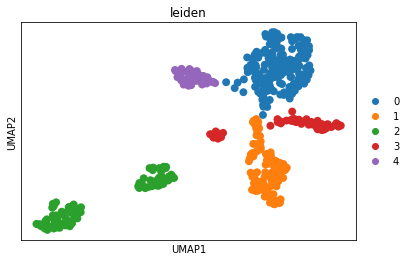

The Rand index is 0.93


In [19]:
# Clusters within a given tissue or cell type designation. This can surface interesting heterogeneity between subpopulations, although it can also make our results more noisy.
# Select only cells taken from the Cerebellum 
cerebellum = adata[adata.obs['subtissue'] == 'Cerebellum']
# Calculate the neighbor graph
sc.pp.neighbors(cerebellum)
# Run UMAP on the data to reduce dimensions
sc.tl.umap(cerebellum)
# Leiden clustering algorithm on data after dimensionality reduction with UMAP
sc.tl.leiden(cerebellum, resolution=0.1, random_state=0)
# Plot the results, color with leiden labels
sc.pl.umap(cerebellum, color='leiden')
# Compute the accuracy of leiden labels
rand_index = adjusted_rand_score(cerebellum.obs['cell_ontology_class'], cerebellum.obs['leiden'])
print('The Rand index is', round(rand_index, 2))

Leiden clustering after UMAP on the cerebellum cells works well, creating 5 clusters and a highly accurate Rand index of 0.93

In [21]:
# Saving data to brain_clusters.h5ad
adata.write(path + 'brain_clusters.h5ad')

### Differential expression & cluster annotation

After assigning cells into clusters, we'd like to understand what makes each cluster different from other cells in the dataset, or to annotate clusters according to their cell types.

One strategy is to look for upregulation of marker genes for cell types of interest (compared to the rest of the dataset).
Another approach is to compare the complete gene expression profiles between groups.

For well-defined cell types, we expect marker genes to show large differences in expression between the cell type of interest and the rest of the dataset, allowing us to use simple methods. We'll focus on this approach for this workshop, while building intuition that is broadly applicable to other approaches.

For differential expression, we need to use the raw values stored in adata.raw since we should account for both the center and spread of the expression in each group.

In [22]:
# Load the clustered data 
adata = sc.read(path + 'brain_clusters.h5ad')
# Load raw values that have not been normalized
raw = pd.DataFrame(data=adata.raw.X, index=adata.raw.obs_names, columns=adata.raw.var_names)

### Comparing distributions 

Differential expression algorithms represent various approaches to comparing the distribution of gene expression in one group versus another group. Unlike bulk RNA-seq, we generally have a large number of samples (i.e. cells) for each group we are comparing in single-cell experiments. Thus, we can take advantage of the whole distribution of expression values in each group to identify differences between groups rather than only comparing estimates of mean-expression as is standard for bulk RNASeq.

In [23]:
# Define gene of interest
astrocyte_marker = 'Gja1' 
# Use a mask to subset dataset to cells assigned to cluster 2
cluster2 = raw[adata.obs['leiden'] == '2'] 
# All other cells
not_cluster2 = raw[adata.obs['leiden'] != '2']

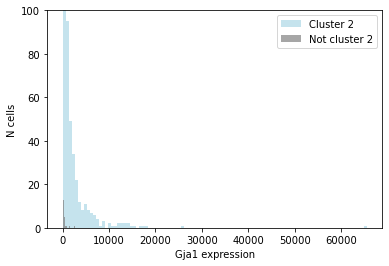

In [24]:
# Expression values of the astrocyte marker across all cells in cluster 2
cluster2_marker_exp = cluster2[astrocyte_marker] 
# Plot the expression of cluster 2, 100 bins, colored light blue, with slight transparency
plt.hist(cluster2_marker_exp.values, bins=100, color='lightblue', alpha=0.7, label='Cluster 2')
# Expression values of the astrocyte marker across all cells not in cluster 2
not_cluster2_marker_exp = not_cluster2[astrocyte_marker]
# Plot the expression of all other cells, colored gray with slight transparency
plt.hist(not_cluster2_marker_exp, bins=100, color='gray', alpha=0.7, label='Not cluster 2')

# Cut off at N=100 for visual clarity
plt.ylim(0,100) 
# Label the axes
plt.xlabel('%s expression'%astrocyte_marker) 
plt.ylabel('N cells')
plt.legend()

We can see that cells in Cluster 2 have higher rates of Gja1 expression that those not in the cluster, though there is overlap.

We can test if this is due to chance by hypothesis testing and checking the p-value.

In [25]:
# Calculates the T-test for the means of two independent samples of scores
# First parameter is the dataset of gene expression in cluster 2, second parameter is of all other cells
# The parameter equal_var is set to false since we cannot assume these populations have equal variance
# If there are NaN values we exclude them
ttest = ttest_ind(cluster2_marker_exp, 
          not_cluster2_marker_exp, 
          equal_var=False, 
          nan_policy='omit')
print(ttest)

Ttest_indResult(statistic=10.638685173301754, pvalue=5.3684728154062e-24)


The p-value is extremely low, which shows that we can  reject the null hypothesis.  The expressions levels of Gja1 between cells outside and inside of Cluster 2 are likely not due to chance, and this sample suggests they have true differences in mean expression.

A t-test is useful since it compares the data to the null hypothesis that the means of two distributions are equivalent. This accounts for the mean, standard deviation, and sample size of the two distributions. However, a p-value alone does not tell us anything about the *magnitude* of that difference: with large N, even very small (and biologically meaningless) differences in expression values can still return very "statistically significant" p-values.

We also cannot say that this definitely shows that Cluster 2 is capturing the astrocyte cells.  Although many cells in this cluster express the marker gene, there are many that don't. We should be careful before assuming that a cluster == a cell type.

## Part 3A: Plotting the top genes for male and female mice

Scanpy has a very useful function for repeating this process of subsetting the dataset to one group and comparing it to the rest of the dataset. It then returns the genes that are most differentially expressed between that group and all others. Let's look at the genes that are most cell-type specific.

/home/vince/Bio/utils/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/vince/Bio/utils/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/home/vince/Bio/utils/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


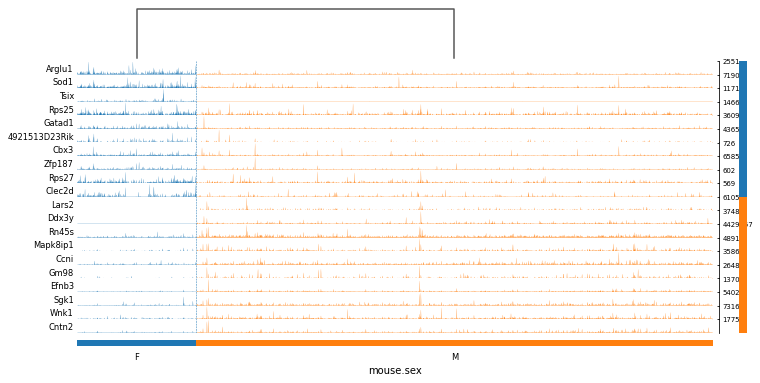

In [31]:
# Rank genes for characterizing groups, takes in AnnData matrix 
# The groupby parameter is the key of observations grouping to consider, in this case the sex of the mouse
# The raw, unnormalized data is being used, so use_raw is set to True
# The method is t-test overestimates variance to compute differential expression
# The n_genes parameter returns the top 10 genes
sc.tl.rank_genes_groups(adata, groupby='mouse.sex', use_raw=True, 
                        method='t-test_overestim_var', n_genes=10)
# Plot the result by cell type
sc.pl.rank_genes_groups_tracksplot(adata, groupby='mouse.sex')

We can see that Arglu1 is more highly expressed in female cells.  This makes sense since ARGLU1 is a protein coding gene which is required for the estrogen-dependent expression of ESR1 target gene.

https://www.genecards.org/cgi-bin/carddisp.pl?gene=ARGLU1

However the remaining genes do not have an obvious explanation for why they are more highly expressed in one sex versus the others.  

For example, Gm98 is myelin regulatory factor why is a transcription factor that promotes the production of myelin.  It is found in mature oligodendrocytes.  It could be over-represented due to the raw dataset having an overabundance of oligodendrocytes and more samples from males.

https://pubmed.ncbi.nlm.nih.gov/22956843/

## Part 3B: Plotting differential expression of dopaminergic and androgen receptor genes

I will write two helper functions which will run T-tests, generate distribution plots, and matrix plots for the mean expression of genes in question.

In [72]:
# Finds if there is a significant difference in the expression of the gene 
#  in cells of cellType between male and female mice
# Takes in AnnData object adata
# Equal variance set to False by default
# The verbose parameter outputs plot and prints p-value by default
def DiffTTestCellGeneMF(adata, cellType, gene, equal_var=False, verbose=True):
    # Subset of raw data from male cells of the given cellType
    males   = raw[ (adata.obs['cell_ontology_class'] == cellType) & (adata.obs['mouse.sex'] == 'M')]
    # Subset of raw data from female cells of the given cellType
    females = raw[ (adata.obs['cell_ontology_class'] == cellType) & (adata.obs['mouse.sex'] == 'F')]
    
    # Gene expression series for males
    m_gene = males[gene]
    # Gene expression series for females
    f_gene = females[gene]
    
    # Run T-test between gene expression of males and females, assumes unequal variance by default
    # Returns a p-value
    ttest = ttest_ind(m_gene, 
          f_gene, 
          equal_var=equal_var,
          nan_policy='omit') 
    # Verbose flag will produce extra output such as a plot and printout
    if verbose:
        plt.hist(m_gene, bins=100, color='blue', alpha=0.7, label='Males')
        plt.hist(f_gene, bins=100, color='red', alpha=0.7, label='Females')
        plt.ylim(0,100) # Cut off at N=100 for visual clarity
        plt.xlabel('%s expression'%gene) # label our axes
        plt.ylabel('N cells')
        plt.legend()
        print(cellType, gene, ttest)
    # Return the p-value of the T-test
    return ttest

In [90]:
# Generates matrix plots based on given dictionary of marker genes
# Creates plot for all cells, as well as each subtype 
# Groups by sex of mouse 
# Use raw set to False by default since dataset skews male and should be normalized
def matrixPlotByCells(adata, marker_genes, groupby, use_raw=False):
    # Matrix plot function takes in AnnData object and dictionary of marker genes 
    # Groups by mouse sex, uses normalized data
    sc.pl.matrixplot(adata, marker_genes, groupby='mouse.sex', use_raw=False, title="All Cells")
    # Local variable which holds the converted marker_genes dictionary of classes 
    #  and genes into one list using list comprehension
    genes = [gene for gene_list in list(marker_genes.values()) for gene in gene_list]
    # Local variable of significant p-values for genes and cell types, if any
    significant = []
    # Loops through cell types creating a plot for each one
    for cellType in pd.unique(adata.obs['cell_ontology_class'].values):
        # Local variable acts as a subset of the adata object, containing only cells of cellType
        adata_cell = adata[adata.obs['cell_ontology_class'] == cellType]
        sc.pl.matrixplot(adata_cell, marker_genes, groupby='mouse.sex', use_raw=False, title=cellType)
        # Perform T-test on each gene in this cellType
        for gene in genes:
            # Call the custom T-test function
            p_value = DiffTTestCellGeneMF(adata, cellType, gene, equal_var=False, verbose=False).pvalue
            # Check if p_value is highly significant
            sig_level = 0.01
            if p_value < sig_level:
                # There is a significant difference in gene expression in this cell type between males and females
                # Tuple of relevant values
                result = (p_value, gene, cellType)
                # Append to list of significant values
                significant.append(result)
    
    # Checks if any significant values were added to list
    if len(significant) == 0:
        print("No significant differences found")
    # Prints significant values if any were found        
    for significant_value in significant:
        print(significant_value)
    # Does not return anything, only produces matrix plots and p-value
    return

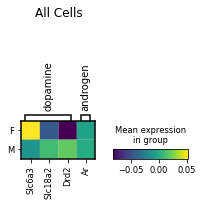

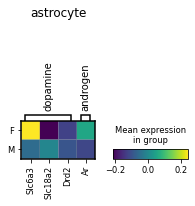

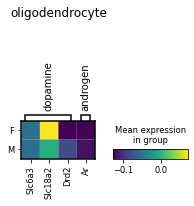

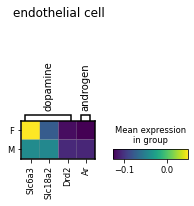

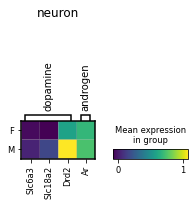

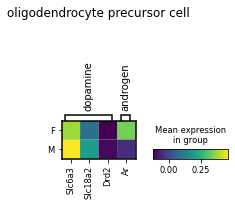

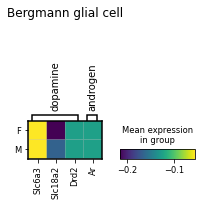

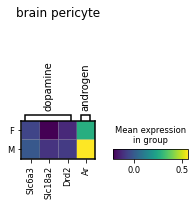

(0.002760303424560952, 'Slc18a2', 'astrocyte')


In [91]:
# Dictionary of marker genes, keys are classes and values are lists of corresponding genes
marker_genes = {
'dopamine': ['Slc6a3','Slc18a2', 'Drd2'],
'androgen': ['Ar']
}

# Calling function to generate matrix plots for each cell type
matrixPlotByCells(adata, marker_genes, groupby='mouse.sex', use_raw=False)

neuron Drd2 Ttest_indResult(statistic=0.5353344965699327, pvalue=0.5940479094574527)


Ttest_indResult(statistic=0.5353344965699327, pvalue=0.5940479094574527)

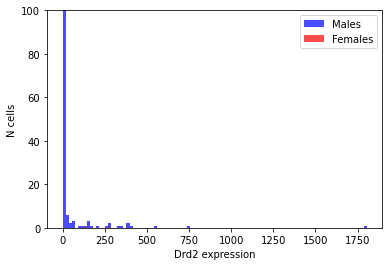

In [73]:
# Calling T-test function which finds if there is a significant difference in the expression of the gene
#  in cells of cellType between male and female mice
DiffTTestCellGeneMF(adata, cellType='neuron', gene='Drd2', equal_var=False, verbose=True)

# Part 4: Analysis of the results

The plots above show that there was not a significant difference in the levels of androgen receptor.  The only differential expression found at a significant level less than 0.01 was in astrocyte cells with gene SLC18A2, also known as VMAT2, which is a transporter of monamines like dopamine.  However the magnitude of the difference in mean gene expression was still quite low.  The other dopaminergic gene expression levels between male and female mice were not significant.  This could be due to a number of issues.  First is that the gene NR3C4 was not present in the dataset so I substituted for the more general androgen receptor gene Ar.  Another problem is that the literature specified that variation in gene expression was found in highly specific regions of the brain, such as the substantia nigra, which may not be adequately covered in the dataset.  

Since androgen receptor was not differentially expressed in brain tissue, and neither DAT or VMAT2 in most cells, I can conclude that my hypothesis was not verified.  Further research is necessary to arrive at a possible explanation for the results.